### Вариант 10


### Задание 2.1.10
##### Метод бисекции
$ f(x) =( tg x )^2 + (\sqrt{3}-1)tg x - \sqrt{3} $ \
$ g(x) =( tg x )^2 - 2 tg x+ 1 $ \
Отрезок $\left [ -1.2, 1 \right ]$ \
$ \varepsilon = 10^{-10} $


##### Аналитическое решение 
Для функции f(x) : $ x_{1}= \frac{1}{4}(\pi +4\pi n) , n\in \mathbb{Z} \approx 0.79 $ ,
$  x_{2}= \frac{1}{3}(-\pi +3\pi n) , n\in \mathbb{Z} \approx -1.05 $ \
Для функции g(x) : $ x= \frac{1}{4}(\pi +4\pi n) , n\in \mathbb{Z} \approx 0.79$



In [120]:
import math 
import cmath
import pylab
import numpy as np

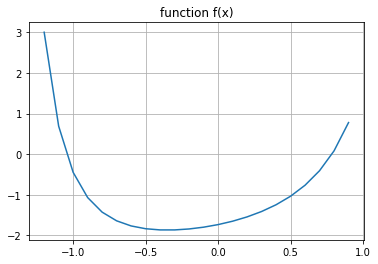

In [121]:
f = lambda x: (math.tan(x))**2 + (math.sqrt(3)-1)*math.tan(x) - math.sqrt(3)

X = np.arange(-1.2, 1, 0.1)
pylab.plot([x for x in X], [f(x) for x in X])
pylab.grid(True)
pylab.title('function f(x)')


# 2 корня на данном отрезке,поэтому будем брать два отрезка : [-1.2,0], [0,1]
a1= -1.2
b1=0
a2=0
b2=1

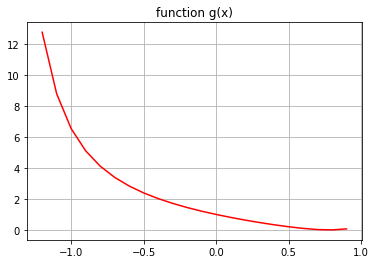

In [122]:
g = lambda x: (math.tan(x))**2 - 2*math.tan(x) + 1 

pylab.plot([x for x in X], [g(x) for x in X], c='r')
pylab.grid(True)
pylab.title('function g(x)')

# 1 корень на данном отрезке 
a=-1.2
b=1

In [125]:
def bisection(a, b, f, e):
    while  abs(a - b) >= e:
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            a, b = (a, x)
        elif f(b) * f(x) < 0:
            a, b = (x, b)
        else:
            return 'Error! Метод бисекции не работает!'
    return (a + b) / 2


In [126]:
e2=10e-10
print ('root 1 of func f = ', bisection(a1,b1,f,e2))
print ('root 2 of func f = ', bisection(a2,b2,f,e2))
print ('root of func g = ', bisection(a,b,g,e2))


root 1 of func f =  -1.0471975511871279
root 2 of func f =  0.7853981633670628
root of func g =  Error! Метод бисекции не работает!


Это происходит потому, что функция не пересекает ось абсцисс, и на концах отрезков всегда функция имеет только знак >0.

# Задание 2.5.2
##### Модифицированный метод Ньютона для случая кратного корня 
$ f(x) = 144 sinx +12\sqrt{3}\pi +36x^{2}+\pi ^{2}-72-12\pi x-72\sqrt{3}x $ \
Отрезок $\left [ -0.3, 0.7 \right ]$ \
$ \varepsilon = 10^{-5} $ \
m=1,2,3,4,5


In [24]:
from math import pi
f = lambda x: 144*math.sin(x)+12*math.sqrt(3)*pi + 36*(x**2) + pi**2 -72 -12*pi*x - 72*math.sqrt(3)*x
f1 = lambda x: 144*math.cos(x)+72*x -12*pi -  72*math.sqrt(3)

e2= 10e-5
a=0.3
b=0.7

def newtons_method(a, b, f, f1,m, e):
    x0 = (a + b) / 2
    x1 = x0 - m*(f(x0) / f1(x0))
    i=0
    while True:
        if math.fabs(x1 - x0) < e: return x1,i
        x0 = x1
        x1 = x0 -m*(f(x0) / f1(x0))
        i+=1


In [25]:
m=[1,2,3,4,5]
for i in range(len(m)):
    print('m = ',m[i])
    print('root of func f = ', newtons_method(a,b,f,f1,m[i],e2))

m =  1
root of func f =  (0.523416589697368, 11)
m =  2
root of func f =  (0.5235663114484017, 5)
m =  3
root of func f =  (0.5235993572712611, 1)
m =  4
root of func f =  (0.5236105751883163, 6)
m =  5
root of func f =  (0.5235636152876691, 15)


# Задание 2.10.4
##### Таблица значений функции, заданной неявно

Функция y=f(x) задана неявно уравнением F(x,y)=0. \
На отрезке [1, 5] построить таблицу значений функции y=f(x) с шагом h=0.5, применяя один из методов численного решения нелинейного уравнения (с точностью $ \varepsilon = 10^{-7} $ ). \
Построить график функции y=f(x) на заданном отрезке. \
$ F(x,y) = e^{xy} -cos(x\sqrt[3]{y}) $ \
$ x\in \left [ 4.5, 7.2 \right ]$ \
$ y\in \left [ -1.2, -0.2 \right ]$ 

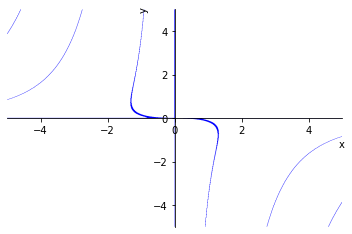

In [145]:
from sympy import var, plot_implicit,cos,exp,nsolve
var('x y')
plot_implicit(exp(x*y) - cos(x*(y**(1/3))))

In [140]:
def bisection_complex(a, b, f, e):
    while  abs(a - b) >= e:
        x = (a + b) / 2
        if np.sign(f(a) * f(x)) == '-1':
            a, b = (a, x)
        elif np.sign(f(b) * f(x)) == '-1':
            a, b = (x, b)
        else:
            return 'Error! Метод бисекции не работает!'
    return (a + b) / 2



In [179]:
h = 0.5
a = 4.5
b = 7.2
N = int((b - a) / h)
x_list = np.linspace(a, b, N+1)
y_list = []
y_list_check = []

In [180]:
for i in range (len(x_list)):
    func = lambda y : cmath.exp(x_arr[i]*y) - cmath.cos(x_arr[i]*(y**(1/3)))
    y_list.append(bisection_complex(-1.2, -0.2, func, 1e-7))

In [181]:
for i in range (len(x_list)):
    y_list_check.append(nsolve(exp(x_arr[i]*y) - cos(x_arr[i]*(y**(1/3))),0))

In [182]:
y_list

['Error! Метод бисекции не работает!',
 'Error! Метод бисекции не работает!',
 'Error! Метод бисекции не работает!',
 'Error! Метод бисекции не работает!',
 'Error! Метод бисекции не работает!',
 'Error! Метод бисекции не работает!']

In [183]:
y_list_check

[0, 0, 0, 0, 0, 0]